# Optional assignment 3
## Search Engines Rate Page Quality
### Task done by Ocheretianyi Ivan
### NIA: 100487317

## Question 1
 Prove that the Google matrix $G$ is a stochastic matrix.
 **Stochastic matrix** is square matrix entries of each column add to one

**Proof**
For a column j in matrix $G$:
$ \sum_{i=0}^{n-1} G_{ij} = \sum_{i=0}^{n-1} (\frac{q}{n} +  \frac{(1 - q) A_{ji}}{n_j}) = q + (1-q) \sum_{i=0}^{n-1} \frac{A_{ji}}{n_j} = q + (1-q) \frac{\sum_{i=0}^{n-1} A_{ji}}{n_j} =^1 q + (1-q) \frac{n_j}{n_j} = q + (1 - q) = 1$
1 - $n_j$ is defined as sum of entries of the row $A_j$ of matrix $A$, hence $\sum_{i=0}^{n-1} A_{ji} = n_j$ Q.E.D $\blacksquare$


## Question 2
Construct the matrix $G$ for the network shown, and verify the given dominant eigenvector $p$

Import needed libraries

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

### Adjacency and Google matrices
Generate adjacency matrix by given edges(array of pairs $(a, b)$, stating that there is an edge from node $a$ to node $b$), and Google matrix G, with $G_{ij} = \frac{q}{n} +  \frac{(1 - q) A_{ji}}{n_j}$ where A is and adjacency matrix and $q$ is such that $1 - q$ is probability that user click randomly clicks on a link from the current page, passed as parameters to function. $G_{ij}$ represents probability with which user being on page j, would move to page i

In [2]:
def generateAdjacencyMatrix(size, edges):
    AMatrix = np.zeros((size, size))
    for edge in edges:
        AMatrix[edge[0]-1][edge[1]-1] = 1
    return AMatrix


def generateGoogleMatrix(adjacency_matrix, q, size):
    GMatrix = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            GMatrix[i][j] = q/size + (1-q)*adjacency_matrix[j][i]/sum(A[j])
    return GMatrix



edges = np.array([
    (1, 2), (1, 9),
    (2, 3), (2, 5), (2, 7),
    (3, 2), (3, 6), (3, 8),
    (4, 3), (4, 12),
    (5, 1), (5, 10),
    (6, 10), (6, 11),
    (7, 10), (7, 11),
    (8, 4), (8, 11),
    (9, 5), (9, 6), (9, 10),
    (10, 13),
    (11, 15),
    (12, 7), (12, 8), (12, 11),
    (13, 9), (13, 14),
    (14, 10), (14, 11), (14, 13), (14, 15),
    (15, 12), (15, 14)
])

size = 15
A = generateAdjacencyMatrix(size, edges)

q = 0.15
G = generateGoogleMatrix(A, q, size)

### Plot graph
The graph represented by adjacency matrix and edge list A can be plotted using the edge list

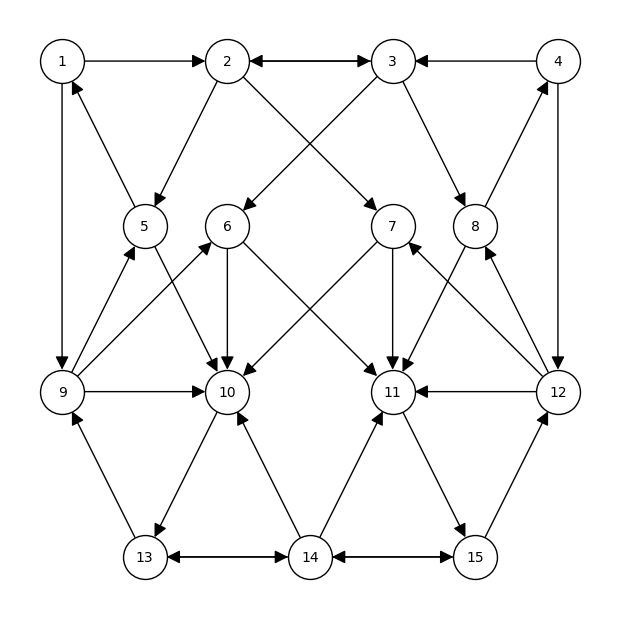

In [3]:
def plotGraph(edge_list, positions):
    G = nx.DiGraph()

    G.add_edges_from(edge_list)

    plt.figure(figsize=(6, 6))
    nx.draw(G, positions, with_labels=True, node_color="white", edgecolors="black", edge_color="black", node_size=1000, font_size=10, arrowsize=20)
    plt.show()

pos = {
    1: (1, 4), 2: (2, 4), 3: (3, 4), 4: (4, 4),  # Row 1
    5: (1.5, 3), 6: (2, 3), 7: (3, 3), 8: (3.5, 3),  # Row 2
    9: (1, 2), 10: (2, 2), 11: (3, 2), 12: (4, 2),  # Row 3
    13: (1.5, 1), 14: (2.5, 1), 15: (3.5, 1)  # Row 4
}
plotGraph(edges, pos)

### Power Method to find dominant eigenvector
The Power Method is an iterative technique used to compute the dominant eigenvalue (the eigenvalue with the largest absolute value) and its corresponding eigenvector of a matrix. The method involves multiplying a random vector by the matrix repeatedly until it converges to the dominant eigenvector.

Given an initial vector $ \mathbf{x_0} $,
**for** $ k = 0, 1, 2, \dots $, the following steps are performed:

1. Compute $ \mathbf{y_{k+1}} = A \mathbf{x_k} $
2. Normalize the vector: $ \mathbf{x_{k+1}} = \frac{\mathbf{y_{k+1}}}{\|\mathbf{y_{k+1}}\|_2} $
3. Repeat the steps until convergence (or for a specified number of iterations).


The result is normalized, however since we work with probabilities, we need to make sum of entries to be equal to 1, therefore the result should be divided by the sum of entries of result vector


In [4]:
def powerMethod(matrix, vec, steps):
    for _ in range(steps):
        vec = np.dot(matrix, vec)
        vec = vec / np.linalg.norm(vec)
    return vec


steps = 100
eigenVector = powerMethod(G, np.ones(size), steps)
probabilities = eigenVector / sum(eigenVector)
task2probability = probabilities

rows = np.arange(1, 16).reshape(-1, 1)  # Row numbers from 1 to 15
table = np.column_stack((rows, task2probability))

# Print formatted output
print("Node |Initial probability q=0.15 ")
print("-" * 32)
for row in table:
    print(f"{int(row[0]):3}  | {row[1]:7.5f} ")

Node |Initial probability q=0.15 
--------------------------------
  1  | 0.02682 
  2  | 0.02986 
  3  | 0.02986 
  4  | 0.02682 
  5  | 0.03959 
  6  | 0.03959 
  7  | 0.03959 
  8  | 0.03959 
  9  | 0.07456 
 10  | 0.10632 
 11  | 0.10632 
 12  | 0.07456 
 13  | 0.12509 
 14  | 0.11633 
 15  | 0.12509 


The result is the same as in the task

### Dominant eigenvalue
Having the eigenvector computed using Power Method, we can compute the corresponding approximate dominant eigenvalue using Rayleigh Quotient $
\lambda = \frac{\mathbf{x_k}^T \cdot A \cdot \mathbf{x_k}}{\mathbf{x_k}^T \cdot \mathbf{x_k}}
$, where $x_k$ is the dominant eigenvector of the matrox $A$. In our case, since we were computing eigenvector of Google matrix $G$, the matrix in formula would be $G$, and $x_k$ would be the vector obtained after $k$ steps of Power Method

In [5]:
def compute_eigenvalue(A, x_k):
    e_val = np.dot(x_k.T, np.dot(A, x_k)) / np.dot(x_k.T, x_k)
    return e_val

eigenvalue = compute_eigenvalue(G, eigenVector)
print(eigenvalue)

1.0


## Question 3
Change the jump probability $q$ to (a) 0 and (b) 0.5. Describe the resulting changes in the page rank.
What is the purpose of the jump probability?

### Case a: $q = 0$

In [6]:
q = 0
G = generateGoogleMatrix(A, q, size)

eigenVector = powerMethod(G, np.ones(size), steps)
probabilities = eigenVector / sum(eigenVector)

task31probability = probabilities
rows = np.arange(1, 16).reshape(-1, 1)
table = np.column_stack((rows, task2probability, task31probability))

print("Node |  q=0.15 |    q=0")
print("-" * 24)
for row in table:
    print(f"{int(row[0]):3}  | {row[1]:7.5f} | {row[2]:7.5f} ")


Node |  q=0.15 |    q=0
------------------------
  1  | 0.02682 | 0.01544 
  2  | 0.02986 | 0.01158 
  3  | 0.02986 | 0.01158 
  4  | 0.02682 | 0.01544 
  5  | 0.03959 | 0.03089 
  6  | 0.03959 | 0.03089 
  7  | 0.03959 | 0.03089 
  8  | 0.03959 | 0.03089 
  9  | 0.07456 | 0.08108 
 10  | 0.10632 | 0.11004 
 11  | 0.10632 | 0.11004 
 12  | 0.07456 | 0.08108 
 13  | 0.12509 | 0.14672 
 14  | 0.11633 | 0.14672 
 15  | 0.12509 | 0.14672 


This case represents situation, when the ranking is based not on the random choice of the webpage among all, but purely on the references (links) at current pages. Similarly to basic case $q=0.15$, the most ranked pages are 13 and 15, but also 14. The most inward-pointing webpages 10 and 11 have links to 13 and 15, that is why they are the most ranked as before, but in this case the chance of the user using links at current webpage is 100%, so the fact that 9, 12 and 14 are referenced by 13 and 15 increases their($9^{th}, 12^{th}, 14^{th}$) ranks also.

### Case b: $q = 0.5$

In [7]:
q = 0.5
G = generateGoogleMatrix(A, q, size)

eigenVector = powerMethod(G, np.ones(size), steps)
probabilities = eigenVector / sum(eigenVector)
task32probability = probabilities
rows = np.arange(1, 16).reshape(-1, 1)
table = np.column_stack((rows, task2probability, task32probability))

print("Node | q = 0.15| q = 0.5")
print("-" * 24)
for row in table:
    print(f"{int(row[0]):3}  | {row[1]:7.5f} | {row[2]:7.5f}")

Node | q = 0.15| q = 0.5
------------------------
  1  | 0.02682 | 0.04674
  2  | 0.02986 | 0.05402
  3  | 0.02986 | 0.05402
  4  | 0.02682 | 0.04674
  5  | 0.03959 | 0.05361
  6  | 0.03959 | 0.05361
  7  | 0.03959 | 0.05361
  8  | 0.03959 | 0.05361
  9  | 0.07456 | 0.06764
 10  | 0.10632 | 0.09463
 11  | 0.10632 | 0.09463
 12  | 0.07456 | 0.06764
 13  | 0.12509 | 0.09047
 14  | 0.11633 | 0.07857
 15  | 0.12509 | 0.09047


In this case, the chance of choosing webpage just randomly increases, therefore the rank of most ranking webpages before decreases and of the least ranked increases, as the fact of random choice increases

### Extra case: $q = 1$

In [8]:
q = 1
G = generateGoogleMatrix(A, q, size)

eigenVector = powerMethod(G, np.ones(size), steps)
probabilities = eigenVector / sum(eigenVector)
task33probability = probabilities

rows = np.arange(1, 16).reshape(-1, 1)
table = np.column_stack((rows, task2probability, task33probability))

print("Node | q = 0.15|   q = 1")
print("-" * 24)
for row in table:
    print(f"{int(row[0]):3}  | {row[1]:7.5f} | {row[2]:7.5f}")

Node | q = 0.15|   q = 1
------------------------
  1  | 0.02682 | 0.06667
  2  | 0.02986 | 0.06667
  3  | 0.02986 | 0.06667
  4  | 0.02682 | 0.06667
  5  | 0.03959 | 0.06667
  6  | 0.03959 | 0.06667
  7  | 0.03959 | 0.06667
  8  | 0.03959 | 0.06667
  9  | 0.07456 | 0.06667
 10  | 0.10632 | 0.06667
 11  | 0.10632 | 0.06667
 12  | 0.07456 | 0.06667
 13  | 0.12509 | 0.06667
 14  | 0.11633 | 0.06667
 15  | 0.12509 | 0.06667


This case is added simply to show that when there is no chance of using links to other webpages within current one, all webpages have the same ranking

## Question 4
Suppose that Page 7 in the network wanted to improve its page rank, compared with its competitor Page 6–say, by persuading Pages 2 and 12 to more prominently display its links to Page 7. Model this by replacing $A_{2,7}$ and $A_{12,7}$ by 2 in the adjacency matrix. Does this strategy succeed? What other changes in relative page ranks do you see?

In [9]:
q = 0.15
A[1][6] = 2
A[11][6] = 2
G = generateGoogleMatrix(A, q, size)

eigenVector = powerMethod(G, np.ones(size), steps)
probabilities = eigenVector / sum(eigenVector)
task4probability = probabilities
rows = np.arange(1, 16).reshape(-1, 1)
table = np.column_stack((rows, task2probability, task4probability))

print("Node | q = 0.15| Page 7 importance ")
print("-" * 34)
for row in table:
    print(f"{int(row[0]):3}  | {row[1]:7.5f} | {row[2]:7.5f} ")

Node | q = 0.15| Page 7 importance 
----------------------------------
  1  | 0.02682 | 0.02600 
  2  | 0.02986 | 0.02848 
  3  | 0.02986 | 0.02623 
  4  | 0.02682 | 0.02394 
  5  | 0.03959 | 0.03764 
  6  | 0.03959 | 0.03902 
  7  | 0.03959 | 0.05284 
  8  | 0.03959 | 0.03280 
  9  | 0.07456 | 0.07619 
 10  | 0.10632 | 0.11155 
 11  | 0.10632 | 0.10327 
 12  | 0.07456 | 0.07232 
 13  | 0.12509 | 0.12974 
 14  | 0.11633 | 0.11729 
 15  | 0.12509 | 0.12271 


This strategy did work, as the ranking of page 7 increased from $0.0396$ to $0.0528$ however the ranking of page 6 barely decreased to $0.039$. Since pages 2 and 12 more prominently display links to page 7, the other webpages($3^{rd}$, $5^{th}$, $8^{th}$ and $11^{th}$) they have links too had their ranking dropped.
The drop of pages 6 and 5 are not that dramatic as increase of page 7, hence webpage 10 has also its ranking increased, although 11 anomalously dropped.


### Question 5
Study the effect of removing Page 10 from the network. (All links to and from Page 10 are deleted.)
Which page ranks increase, and which decrease?

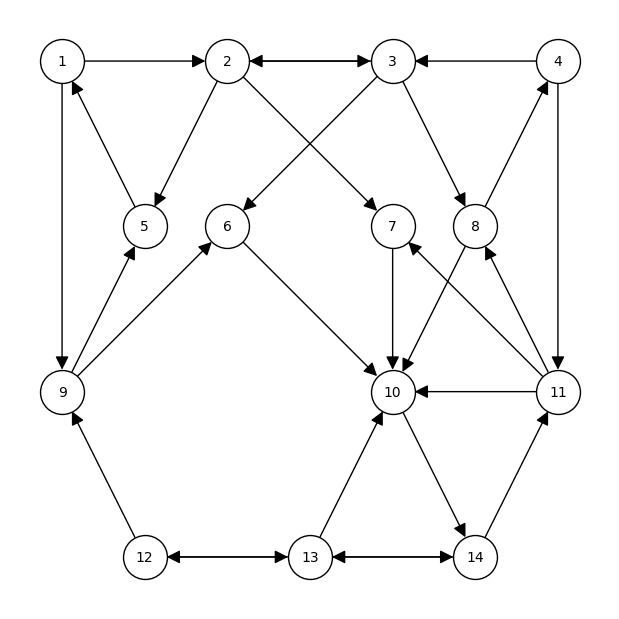

In [10]:
edges = np.array([
    (1, 2), (1, 9),
    (2, 3), (2, 5), (2, 7),
    (3, 2), (3, 6), (3, 8),
    (4, 3), (4, 11),
    (5, 1),
    (6, 10),
    (7, 10),
    (8, 4), (8, 10),
    (9, 5), (9, 6),
    (10, 14),
    (11, 7), (11, 8), (11, 10),
    (12, 9), (12, 13),
    (13, 10), (13, 12), (13, 14),
    (14, 11), (14, 13)
])

pos = {
    1: (1, 4), 2: (2, 4), 3: (3, 4), 4: (4, 4),  # Row 1
    5: (1.5, 3), 6: (2, 3), 7: (3, 3), 8: (3.5, 3),  # Row 2
    9: (1, 2), 10: (3, 2), 11: (4, 2),  # Row 3
    12: (1.5, 1), 13: (2.5, 1), 14: (3.5, 1)  # Row 4
}
plotGraph(edges, pos)

In [11]:
size = 14
A = generateAdjacencyMatrix(size, edges)
G = generateGoogleMatrix(A, q, size)
eigenVector = powerMethod(G, np.ones(size), steps)
probabilities = eigenVector / sum(eigenVector)

task5probability = probabilities
task5probability = np.insert(task5probability, 9, 0)
rows = np.arange(1, 16).reshape(-1, 1)
table = np.column_stack((rows, task2probability, task5probability))

print("Node | q = 0.15| No node 10 ")
print("-" * 34)
for row in table:
    print(f"{int(row[0]):3}  | {row[1]:7.5f} | {row[2]:7.5f} ")

Node | q = 0.15| No node 10 
----------------------------------
  1  | 0.02682 | 0.04709 
  2  | 0.02986 | 0.04091 
  3  | 0.02986 | 0.03594 
  4  | 0.02682 | 0.03207 
  5  | 0.03959 | 0.04280 
  6  | 0.03959 | 0.04139 
  7  | 0.03959 | 0.05166 
  8  | 0.03959 | 0.05025 
  9  | 0.07456 | 0.04822 
 10  | 0.10632 | 0.00000 
 11  | 0.10632 | 0.17096 
 12  | 0.07456 | 0.10360 
 13  | 0.12509 | 0.04116 
 14  | 0.11633 | 0.10746 
 15  | 0.12509 | 0.18648 


The ranking of all the webpages increased except for the pages 9, 13 and 14. The drop is dramatic is case of page 13, as its ranking was high due to the fact, that popular page 10 had link to id, and now there is no page 10, its ranking dropped. For this reason, pages 9 and 14 also dropped ranking as ranking of page 10 is lower now, so these pages would be also less useful.
On the other hand, some pages increased rank drastically, like 11, as now it is the only most referenced webpage, so has the highest ranking, hence ranking of 15 has increased a lot, as the most referenced page refers to it. Similarly ranking of 12 increased.

All probabilities shown together

In [12]:
# Stack arrays for vertical representation
rows = np.arange(1, 16).reshape(-1, 1)
table = np.column_stack((rows, task2probability, task31probability, task32probability, task33probability, task4probability, task5probability))

print("Node |    Q2   |   Q3.a  |   Q3.b  |   Q3.c  |    Q4   |    Q5  ")
print("-" * 64)
for row in table:
    print(f"{int(row[0]):3}  | {row[1]:7.3f} | {row[2]:7.3f} | {row[3]:7.3f} | {row[4]:7.3f} | {row[5]:7.3f} | {row[6]:7.3f}")

Node |    Q2   |   Q3.a  |   Q3.b  |   Q3.c  |    Q4   |    Q5  
----------------------------------------------------------------
  1  |   0.027 |   0.015 |   0.047 |   0.067 |   0.026 |   0.047
  2  |   0.030 |   0.012 |   0.054 |   0.067 |   0.028 |   0.041
  3  |   0.030 |   0.012 |   0.054 |   0.067 |   0.026 |   0.036
  4  |   0.027 |   0.015 |   0.047 |   0.067 |   0.024 |   0.032
  5  |   0.040 |   0.031 |   0.054 |   0.067 |   0.038 |   0.043
  6  |   0.040 |   0.031 |   0.054 |   0.067 |   0.039 |   0.041
  7  |   0.040 |   0.031 |   0.054 |   0.067 |   0.053 |   0.052
  8  |   0.040 |   0.031 |   0.054 |   0.067 |   0.033 |   0.050
  9  |   0.075 |   0.081 |   0.068 |   0.067 |   0.076 |   0.048
 10  |   0.106 |   0.110 |   0.095 |   0.067 |   0.112 |   0.000
 11  |   0.106 |   0.110 |   0.095 |   0.067 |   0.103 |   0.171
 12  |   0.075 |   0.081 |   0.068 |   0.067 |   0.072 |   0.104
 13  |   0.125 |   0.147 |   0.090 |   0.067 |   0.130 |   0.041
 14  |   0.116 |   0.147 

### Question 6
Design your own network, compute page ranks, and analyze according to the preceding questions.

The example will be generated randomly using random amount of nodes, edges (but still at least one arrow should point from any webpage)

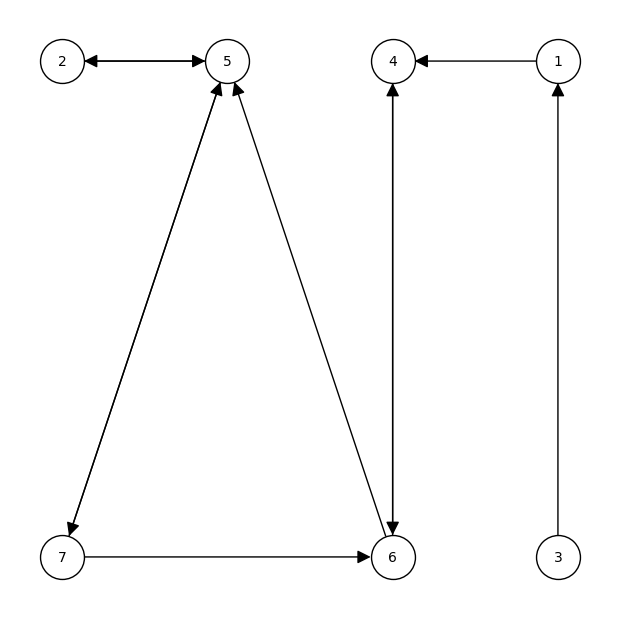

In [13]:
size = 7
edges = np.array([
    (1, 4),
    (2, 5),
    (3, 1),
    (4, 6),
    (5, 2), (5, 7),
    (6, 4), (6, 5),
    (7, 6), (7, 5)
])
pos = {
    1: (4, 2), 2: (1, 2), 4: (3, 2), 5: (2, 2),  # Row 1
    3: (4, 1), 6: (3, 1), 7: (1, 1) # Row 2
}
plotGraph(edges, pos)

### Question 2

In [14]:
A = generateAdjacencyMatrix(size, edges)
q = 0.15
G = generateGoogleMatrix(A, q, size)

eigenVector = powerMethod(G, np.ones(size), steps)
probabilities = eigenVector / sum(eigenVector)
task2probability = probabilities
rows = np.arange(1, size+1).reshape(-1, 1)
table = np.column_stack((rows, task2probability))
print("Node | Initial probability q=0.15 ")
print("-" * 33)
for row in table:
    print(f"{int(row[0]):3}  | {row[1]:7.5f} ")

Node | Initial probability q=0.15 
---------------------------------
  1  | 0.03964 
  2  | 0.14750 
  3  | 0.02143 
  4  | 0.14227 
  5  | 0.29663 
  6  | 0.20504 
  7  | 0.14750 


As there is no webpage having link to page 1, it has the lowest rate. Although on webpage 3 there is link to page 1, it still has pretty low rate as page 3 is the lowest ranked. Webpage 2 is also referred by one webpage, however by 5, that has 3 webpages references on the other pages, so it has much higher rate than 1. Regarding five, it has the most inward-pointing links, so it is the most rated. Although page 2 and 7 are also referred by one webpage (like page 1), it is referred by 5, the most rated, so it has higher rate, but it could have been higher rated if it had references on more than one page.

### Question 3

### $q = 0$

In [15]:
q = 0
G = generateGoogleMatrix(A, q, size)

eigenVector = powerMethod(G, np.ones(size), steps)
probabilities = eigenVector / sum(eigenVector)

task31probability = probabilities
rows = np.arange(1, size+1).reshape(-1, 1)
table = np.column_stack((rows, task2probability, task31probability))

print("Node |  q=0.15 |    q=0")
print("-" * 24)
for row in table:
    print(f"{int(row[0]):3}  | {row[1]:7.5f} | {row[2]:7.5f} ")


Node |  q=0.15 |    q=0
------------------------
  1  | 0.03964 | 0.00000 
  2  | 0.14750 | 0.18182 
  3  | 0.02143 | 0.00000 
  4  | 0.14227 | 0.09091 
  5  | 0.29663 | 0.36364 
  6  | 0.20504 | 0.18182 
  7  | 0.14750 | 0.18182 


Interesting changes appears, as pages 1 and 3 have ranking 0, because page 3 is referred by no pages, and 1 by 3, which also has rate 0, thus has same rate 0. For the same reason, webpage 4 has lower ranking.

### $q = 0.5$

In [16]:
q = 0.5
G = generateGoogleMatrix(A, q, size)

eigenVector = powerMethod(G, np.ones(size), steps)
probabilities = eigenVector / sum(eigenVector)
task32probability = probabilities
rows = np.arange(1, size+1).reshape(-1, 1)
table = np.column_stack((rows, task2probability, task32probability))

print("Node | q = 0.15| q = 0.5")
print("-" * 24)
for row in table:
    print(f"{int(row[0]):3}  | {row[1]:7.5f} | {row[2]:7.5f}")

Node | q = 0.15| q = 0.5
------------------------
  1  | 0.03964 | 0.10714
  2  | 0.14750 | 0.12440
  3  | 0.02143 | 0.07143
  4  | 0.14227 | 0.17215
  5  | 0.29663 | 0.21188
  6  | 0.20504 | 0.18860
  7  | 0.14750 | 0.12440


The fact that random page can be chosen, increases ranking of page 3 and 1. But in general, the relative rating of all pages keeps the same, except for webpage 4 overtaking pages 2 and 7, due to the increase of rating of pages 1 and 3

### Question 4
Let try to increase ranking of page 6 by persuading pages 7 and 4 to more prominently display links to page 6

In [17]:
q = 0.15
A[3][5] = 7
A[6][5] = 7
G = generateGoogleMatrix(A, q, size)

eigenVector = powerMethod(G, np.ones(size), steps)
probabilities = eigenVector / sum(eigenVector)
task4probability = probabilities
rows = np.arange(1, size+1).reshape(-1, 1)
table = np.column_stack((rows, task2probability, task4probability))

print("Node | q = 0.15| Page 6 importance ")
print("-" * 34)
for row in table:
    print(f"{int(row[0]):3}  | {row[1]:7.5f} | {row[2]:7.5f} ")

Node | q = 0.15| Page 6 importance 
----------------------------------
  1  | 0.03964 | 0.03964 
  2  | 0.14750 | 0.13005 
  3  | 0.02143 | 0.02143 
  4  | 0.14227 | 0.16492 
  5  | 0.29663 | 0.25558 
  6  | 0.20504 | 0.25833 
  7  | 0.14750 | 0.13005 


After couples of testing, only by setting value 7 in adjacency matrix, the webpage 6 can become higher rated that page 5, but in real life this would be very hard to perform.

### Question 6
The webpage 7 would be removed

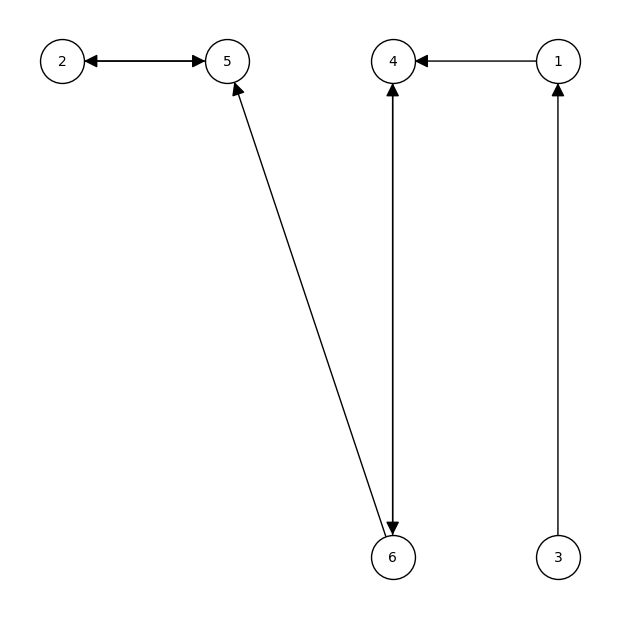

In [18]:
edges = np.array([
    (1, 4),
    (2, 5),
    (3, 1),
    (4, 6),
    (5, 2),
    (6, 4), (6, 5)
])
pos = {
    1: (4, 2), 2: (1, 2), 4: (3, 2), 5: (2, 2),  # Row 1
    3: (4, 1), 6: (3, 1) # Row 2
}
plotGraph(edges, pos)

In [19]:
size = 6
A = generateAdjacencyMatrix(size, edges)
G = generateGoogleMatrix(A, q, size)
eigenVector = powerMethod(G, np.ones(size), steps)
probabilities = eigenVector / sum(eigenVector)

task5probability = probabilities
task5probability = np.append(task5probability, 0)
rows = np.arange(1, 8).reshape(-1, 1)
table = np.column_stack((rows, task2probability, task5probability))

print("Node | q = 0.15| No node 7 ")
print("-" * 26)
for row in table:
    print(f"{int(row[0]):3}  | {row[1]:7.5f} | {row[2]:7.5f} ")

Node | q = 0.15| No node 7 
--------------------------
  1  | 0.03964 | 0.04625 
  2  | 0.14750 | 0.32903 
  3  | 0.02143 | 0.02500 
  4  | 0.14227 | 0.11732 
  5  | 0.29663 | 0.35768 
  6  | 0.20504 | 0.12472 
  7  | 0.14750 | 0.00000 


Since there is no page 7, page 5 has link only to webpage 2, so its ranking increased dramatically. Also ranking of page 6 decreased, as now only node 4 points to it, relatively its position did not change except for swapping places with 2.

In [22]:
rows = np.arange(1, 8).reshape(-1, 1)
table = np.column_stack((rows, task2probability, task31probability, task32probability, task4probability, task5probability))

print("Node |    Q2   |   Q3.a  |   Q3.b  |   Q4   |    Q5  ")
print("-" * 54)
for row in table:
    print(f"{int(row[0]):3}  | {row[1]:7.3f} | {row[2]:7.3f} | {row[3]:7.3f} | {row[4]:7.3f} | {row[5]:7.3f}")

Node |    Q2   |   Q3.a  |   Q3.b  |   Q4   |    Q5  
------------------------------------------------------
  1  |   0.040 |   0.000 |   0.107 |   0.040 |   0.046
  2  |   0.147 |   0.182 |   0.124 |   0.130 |   0.329
  3  |   0.021 |   0.000 |   0.071 |   0.021 |   0.025
  4  |   0.142 |   0.091 |   0.172 |   0.165 |   0.117
  5  |   0.297 |   0.364 |   0.212 |   0.256 |   0.358
  6  |   0.205 |   0.182 |   0.189 |   0.258 |   0.125
  7  |   0.147 |   0.182 |   0.124 |   0.130 |   0.000
